# Semantic Chunking for RAG


In [132]:
!pip install -qU \
	semantic-router \
	semantic-chunkers \
	pinecone-client \
	datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [133]:
!pip install -qU "semantic-router[fastembed]"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [134]:
from datasets import load_dataset

dataset = load_dataset("jamescalam/ai-arxiv2", split="train[:10]")
dataset

Dataset({
    features: ['id', 'title', 'summary', 'source', 'authors', 'categories', 'comment', 'journal_ref', 'primary_category', 'published', 'updated', 'content', 'references'],
    num_rows: 10
})

Initialize encoder which will be used to identify semantically concise splits in our dataset.


In [135]:
import os
from getpass import getpass
from semantic_router.encoders import FastEmbedEncoder

encoder = FastEmbedEncoder(name="BAAI/bge-small-en-v1.5")

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [136]:
print(dataset["content"][1])

3 2 0 2
c e D 8 2 ] G L . s c [
1 v 8 3 2 7 1 . 2 1 3 2 : v i X r a
# Fast Inference of Mixture-of-Experts Language Models with Offloading
Artyom Eliseev Moscow Institute of Physics and Technology Yandex School of Data Analysis lavawolfiee@gmail.com
# Denis Mazur Moscow Institute of Physics and Technology Yandex Researchcore denismazur8@gmail.com
# Abstract
With the widespread adoption of Large Language Models (LLMs), many deep learning practitioners are looking for strategies of running these models more efficiently. One such strategy is to use sparse Mixture-of-Experts (MoE) â a type of model architectures where only a fraction of model layers are active for any given input. This property allows MoE-based language models to generate tokens faster than their âdenseâ counterparts, but it also increases model size due to having multiple âexpertsâ. Unfortunately, this makes state-of-the-art MoE language models difficult to run without high-end GPUs. In this work, we study the p

In [137]:
from semantic_chunkers import StatisticalChunker

chunker = StatisticalChunker(
    encoder=encoder,
    min_split_tokens=100,
    max_split_tokens=500,
    window_size=2,
    plot_chunks=True,
    enable_statistics=True,
)

2024-08-05 15:20:26 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/8 [00:00<?, ?it/s]

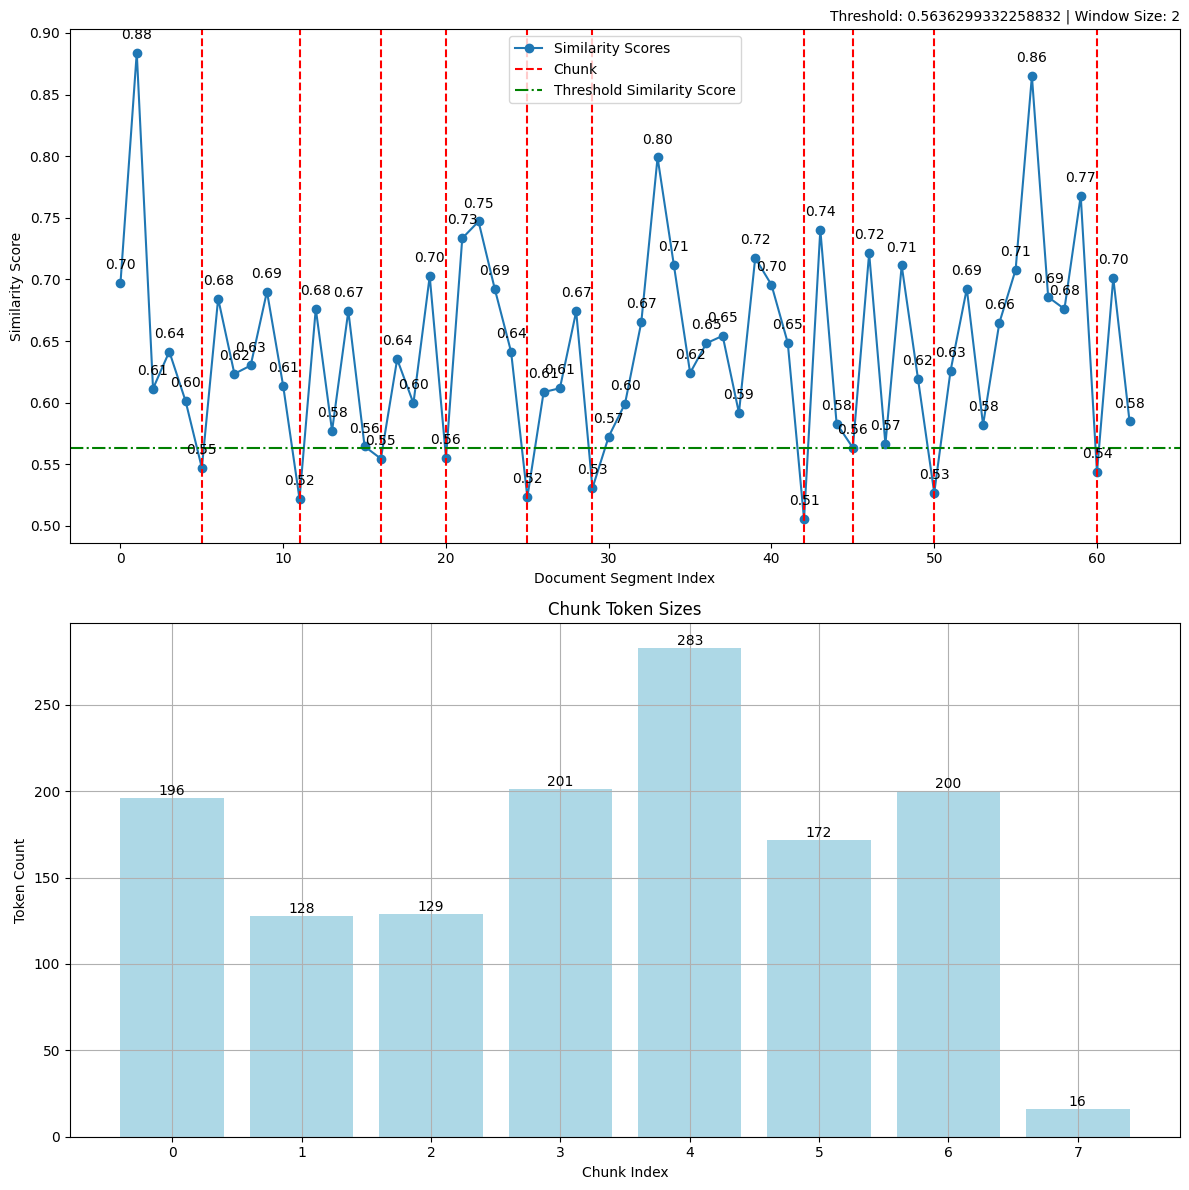

Chunking Statistics:
  - Total Documents: 64
  - Total Chunks: 8
  - Chunks by Threshold: 7
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 16
  - Maximum Token Size of Chunk: 283
  - Similarity Chunk Ratio: 0.88


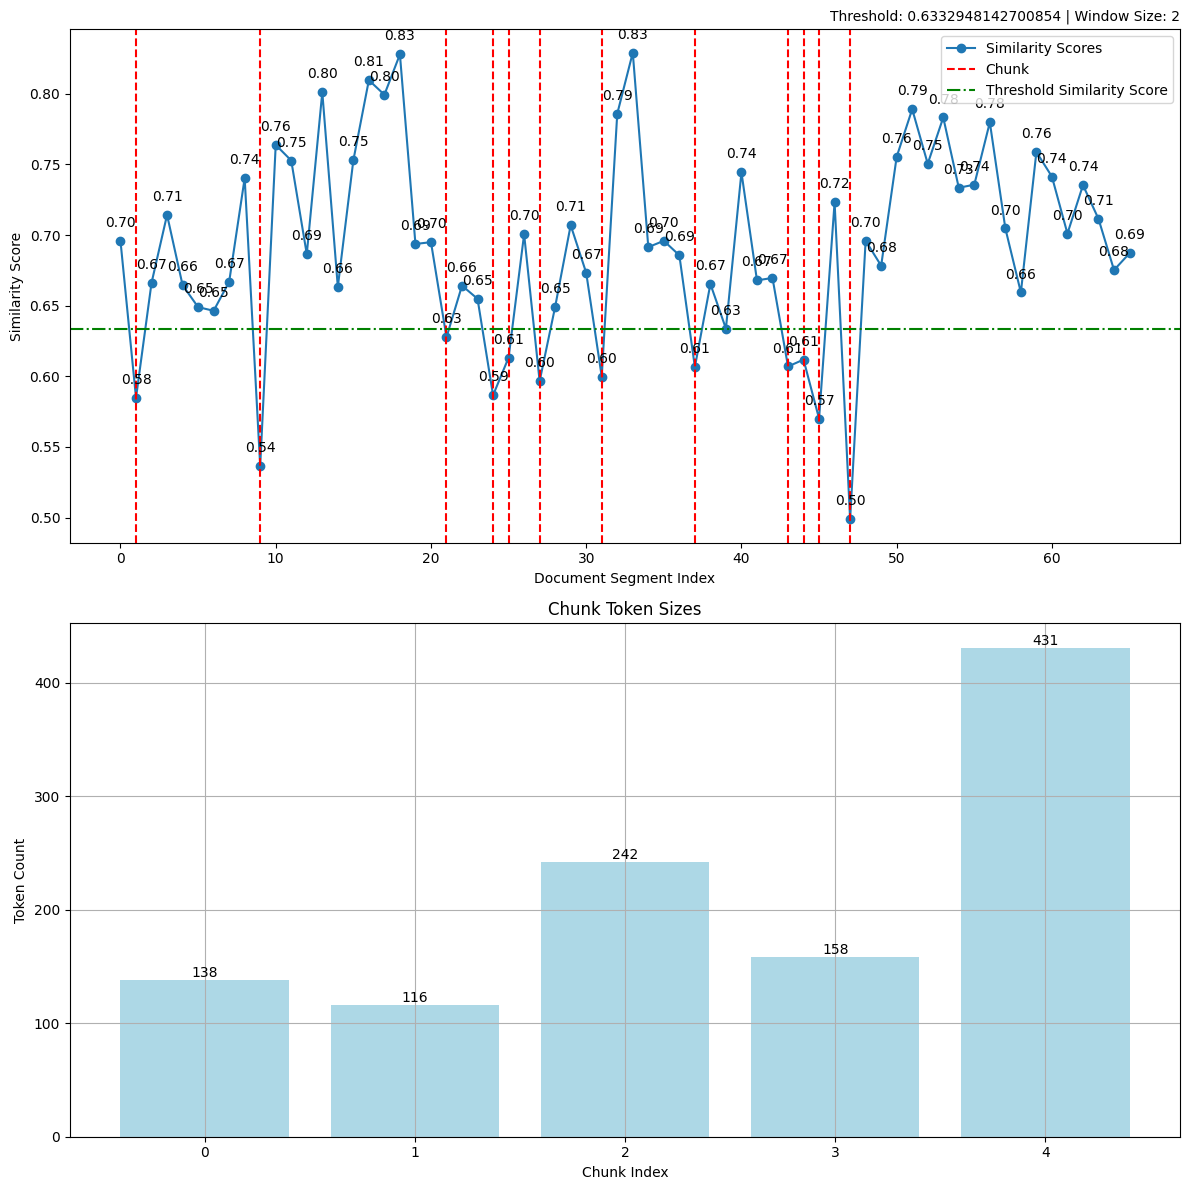

Chunking Statistics:
  - Total Documents: 67
  - Total Chunks: 5
  - Chunks by Threshold: 4
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 116
  - Maximum Token Size of Chunk: 431
  - Similarity Chunk Ratio: 0.80


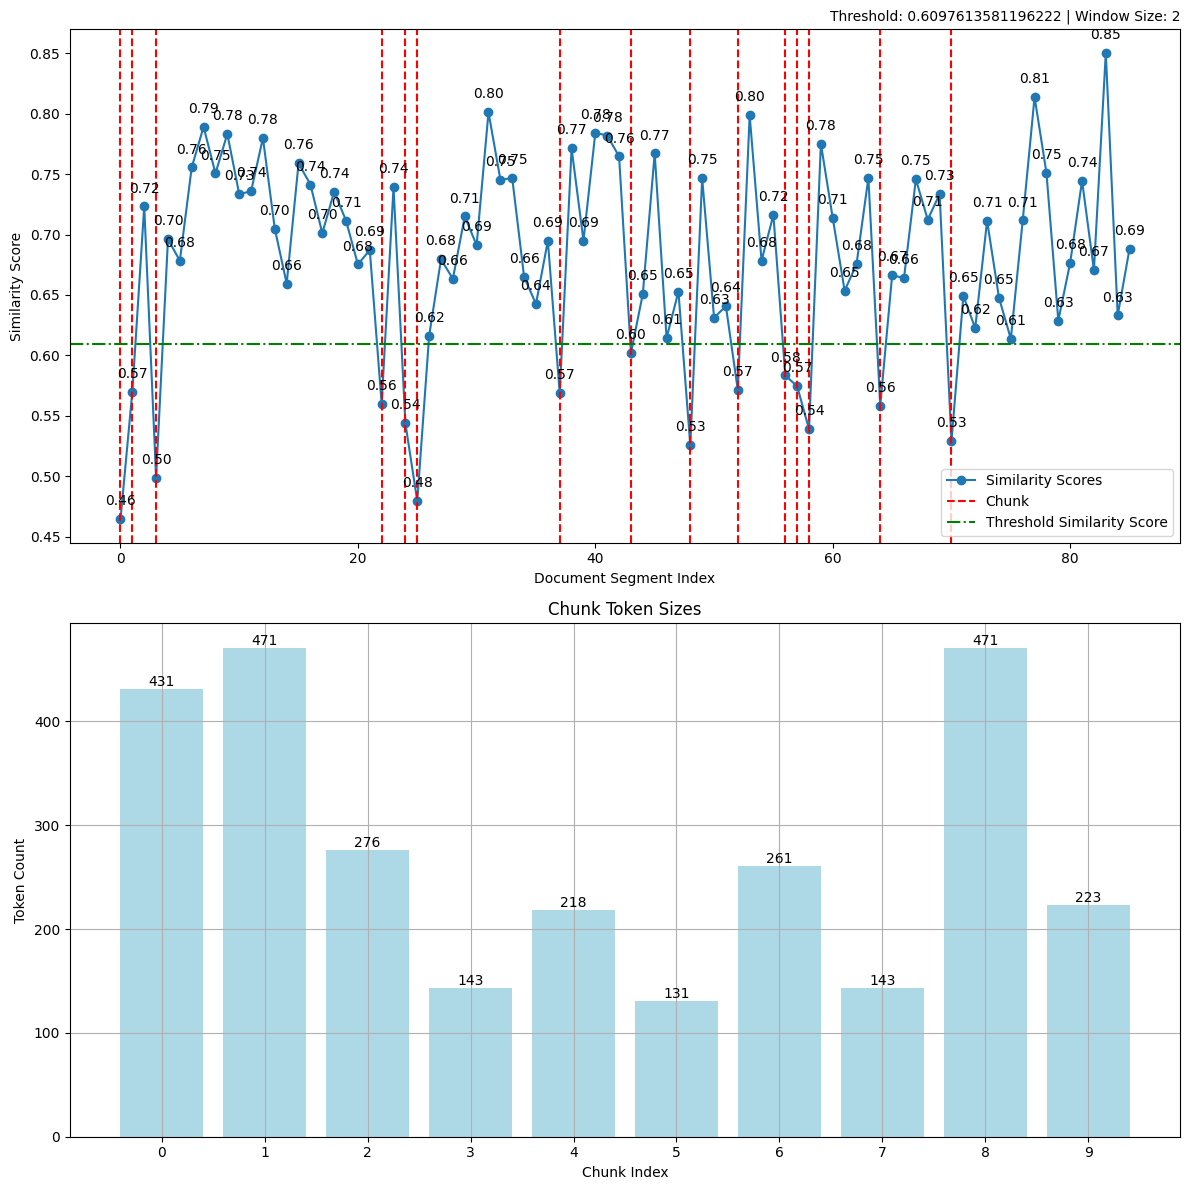

Chunking Statistics:
  - Total Documents: 87
  - Total Chunks: 10
  - Chunks by Threshold: 7
  - Chunks by Max Chunk Size: 2
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 131
  - Maximum Token Size of Chunk: 471
  - Similarity Chunk Ratio: 0.70


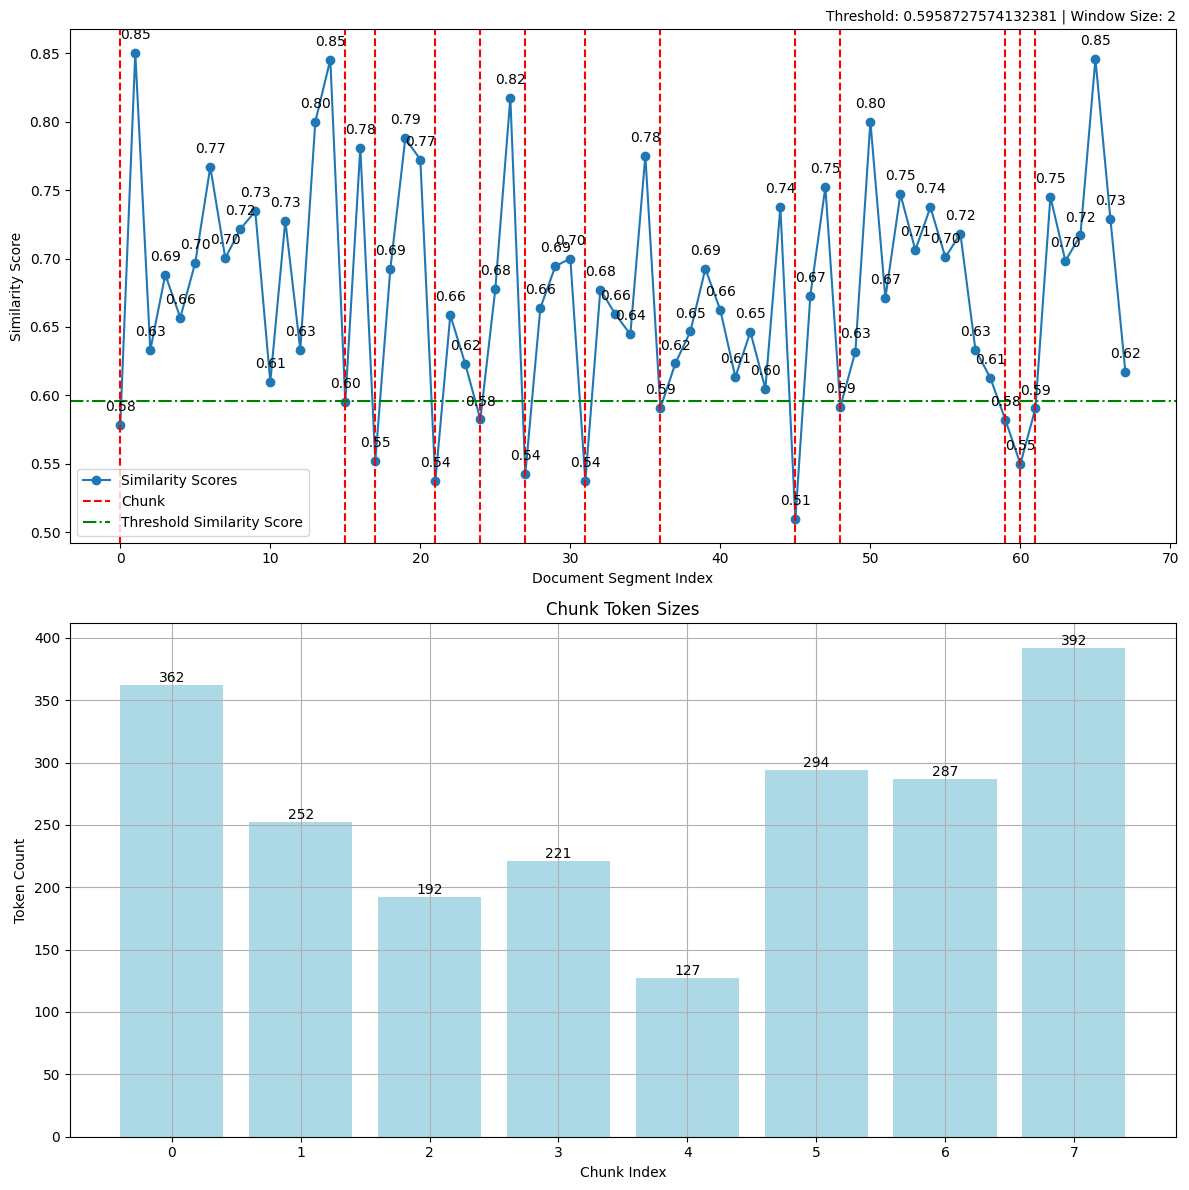

Chunking Statistics:
  - Total Documents: 69
  - Total Chunks: 8
  - Chunks by Threshold: 6
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 127
  - Maximum Token Size of Chunk: 392
  - Similarity Chunk Ratio: 0.75


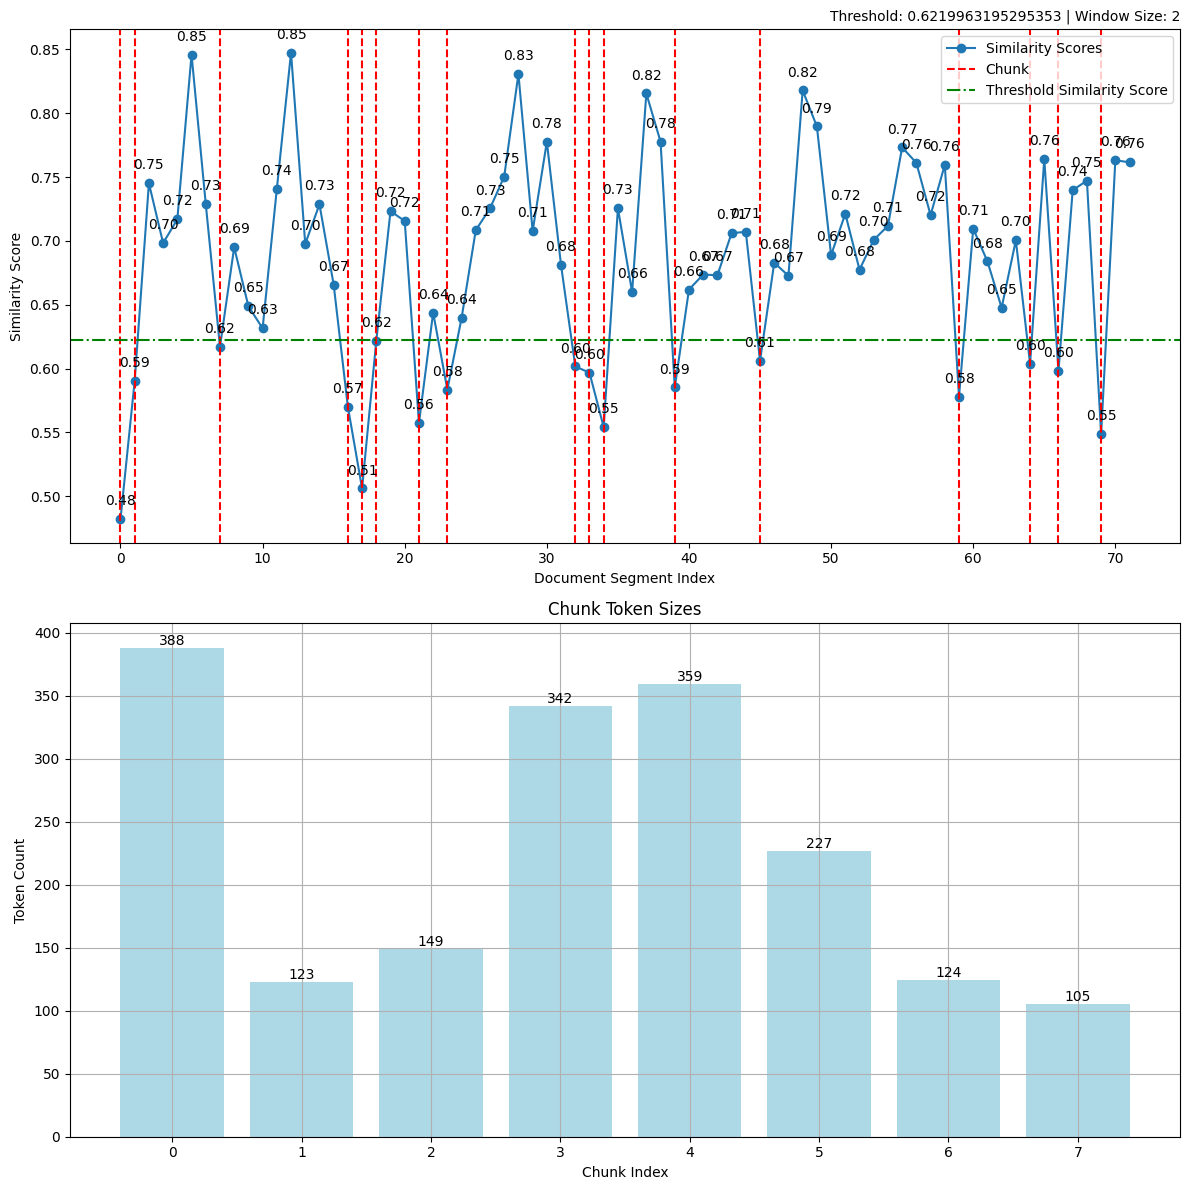

Chunking Statistics:
  - Total Documents: 73
  - Total Chunks: 8
  - Chunks by Threshold: 7
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 105
  - Maximum Token Size of Chunk: 388
  - Similarity Chunk Ratio: 0.88


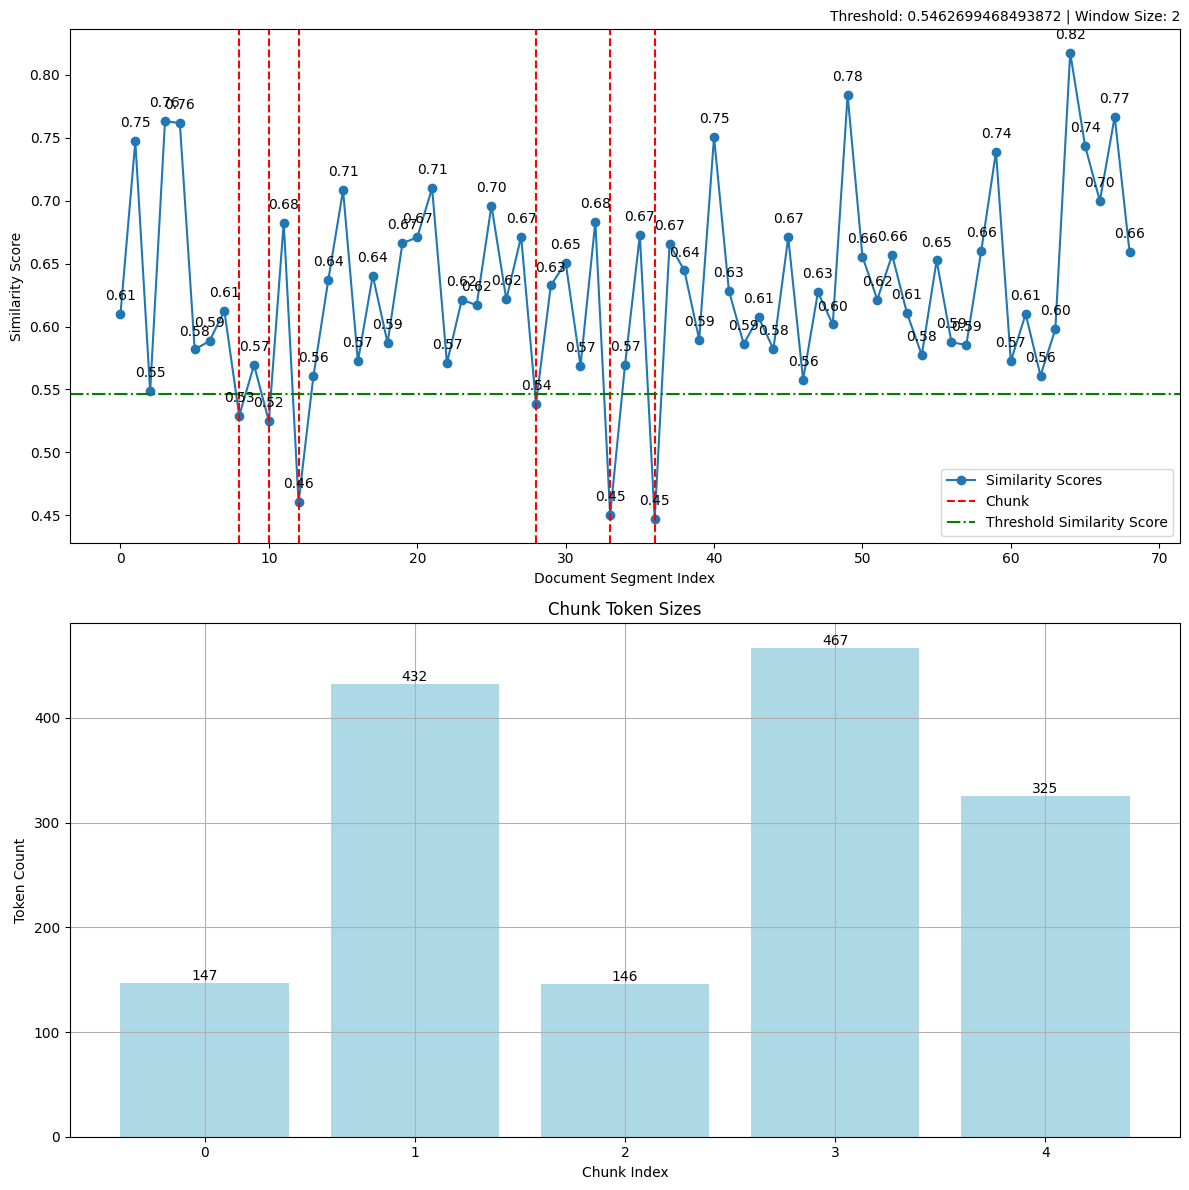

Chunking Statistics:
  - Total Documents: 70
  - Total Chunks: 5
  - Chunks by Threshold: 3
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 146
  - Maximum Token Size of Chunk: 467
  - Similarity Chunk Ratio: 0.60


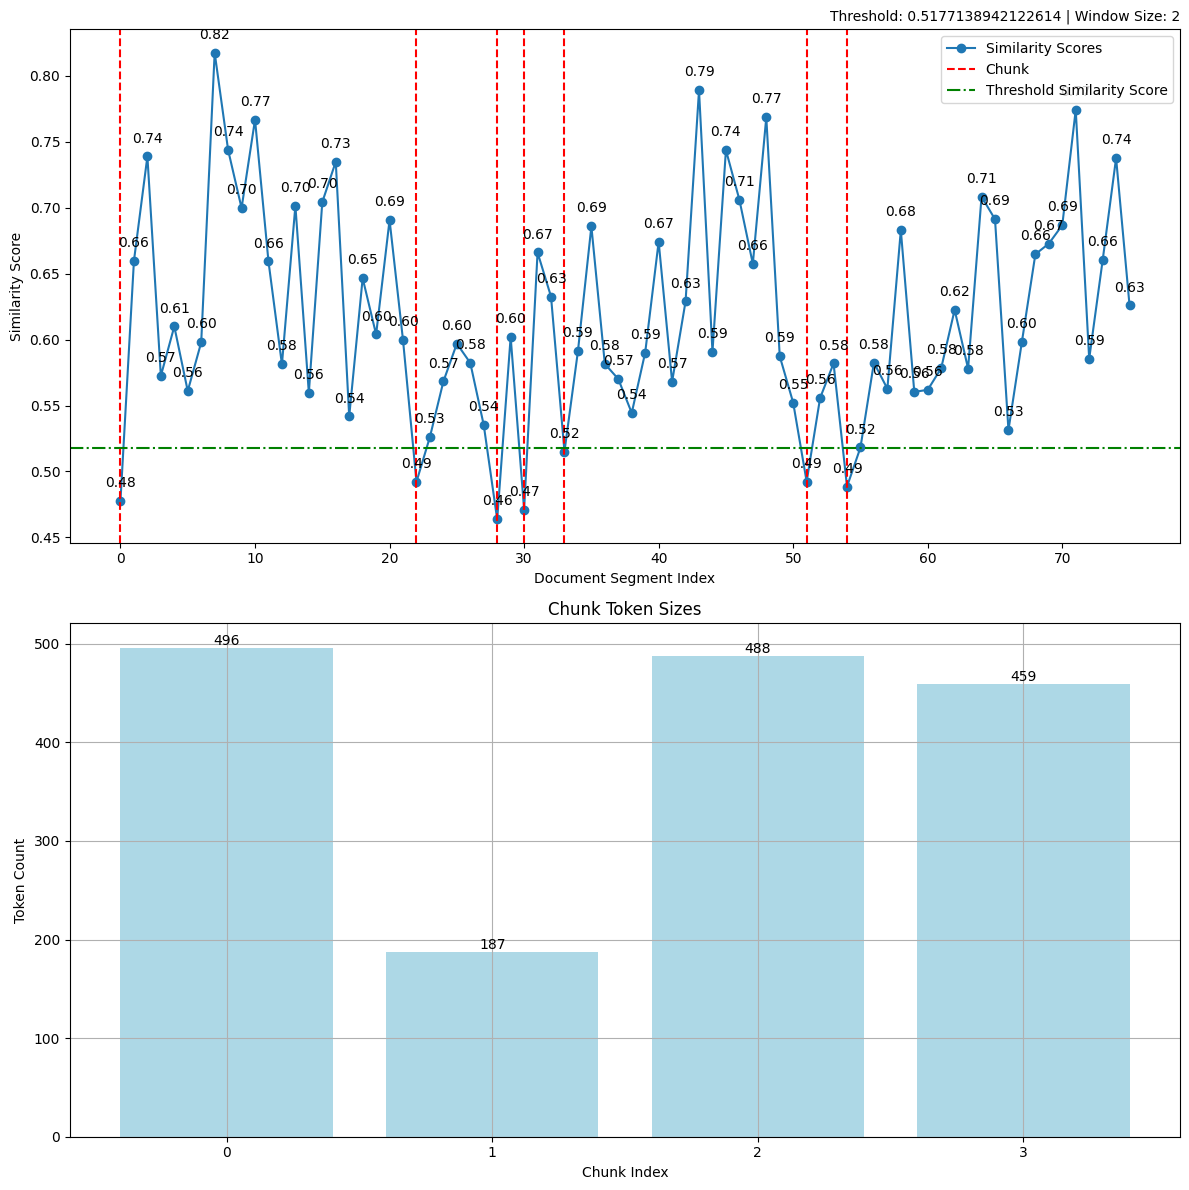

Chunking Statistics:
  - Total Documents: 77
  - Total Chunks: 4
  - Chunks by Threshold: 2
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 187
  - Maximum Token Size of Chunk: 496
  - Similarity Chunk Ratio: 0.50


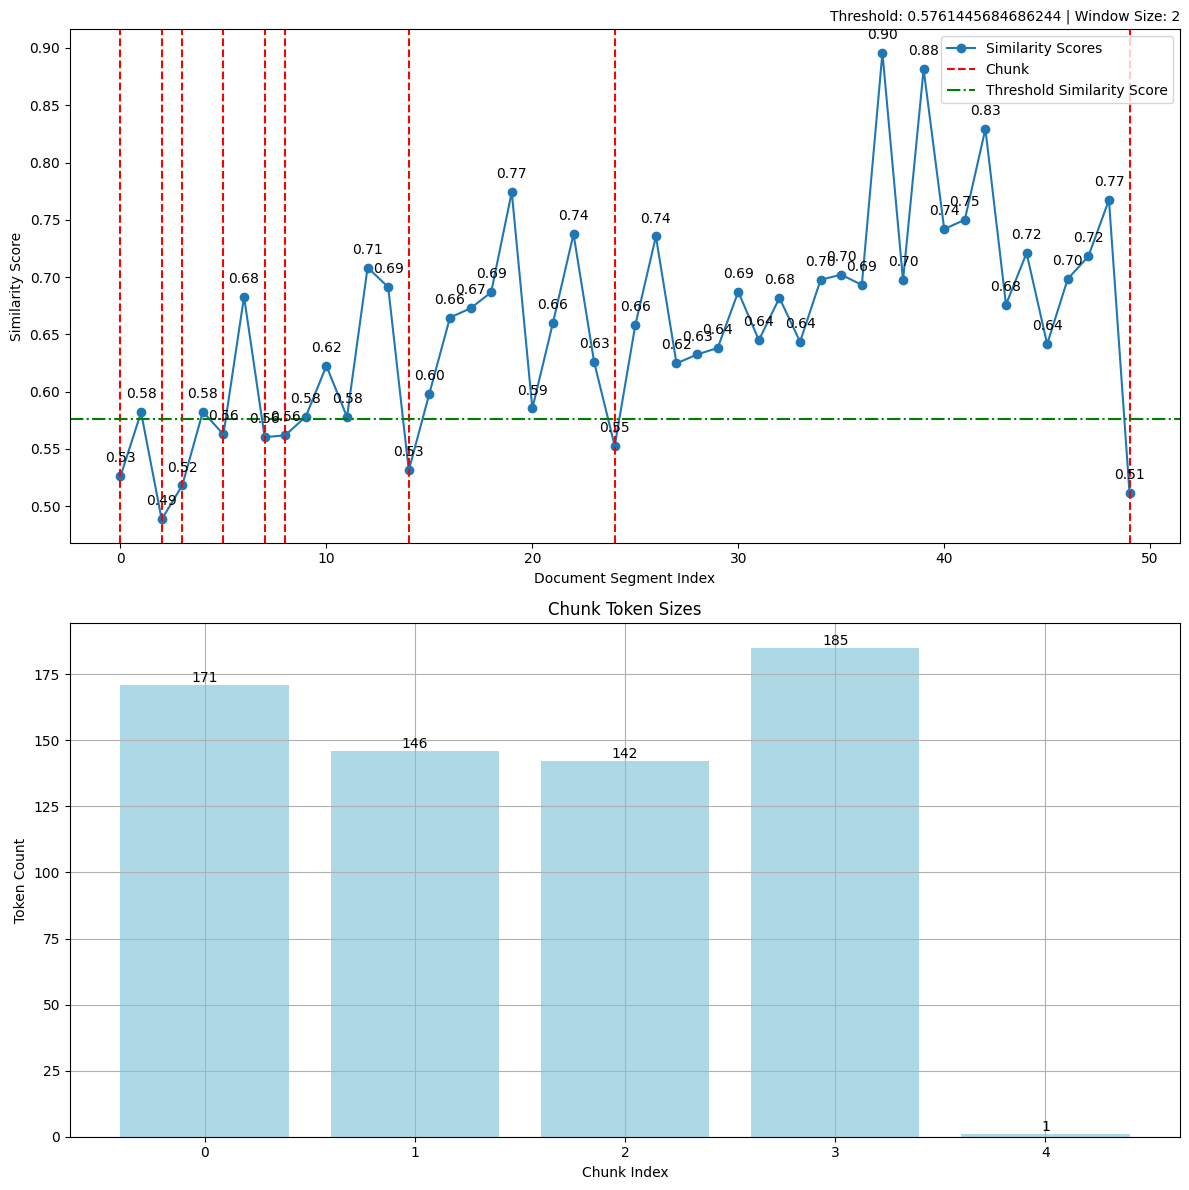

Chunking Statistics:
  - Total Documents: 51
  - Total Chunks: 5
  - Chunks by Threshold: 4
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 1
  - Maximum Token Size of Chunk: 185
  - Similarity Chunk Ratio: 0.80


In [138]:
chunks = chunker(docs=[dataset["content"][0]])

In [139]:
chunker.print(chunks[0])

Split 1, tokens 196, triggered by: 0.55
4 2 0 2 n a J 8 ] G L . s c [ 1 v 8 8 0 4 0 . 1 0 4 2 : v i X r a # Mixtral of Experts Albert Q. Jiang, Alexandre Sablayrolles, Antoine Roux, Arthur Mensch, Blanche Savary, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Emma Bou Hanna, Florian Bressand, Gianna Lengyel, Guillaume Bour, Guillaume Lample, LÃ©lio Renard Lavaud, Lucile Saulnier, Marie-Anne Lachaux, Pierre Stock, Sandeep Subramanian, Sophia Yang, Szymon Antoniak, Teven Le Scao, ThÃ©ophile Gervet, Thibaut Lavril, Thomas Wang, TimothÃ©e Lacroix, William El Sayed
----------------------------------------------------------------------------------------


Split 2, tokens 128, triggered by: 0.52
Abstract We introduce Mixtral 8x7B, a Sparse Mixture of Experts (SMoE) language model. Mixtral has the same architecture as Mistral 7B, with the difference that each layer is composed of 8 feedforward blocks (i.e. experts). For every token, at each layer, a router network selects two exper

When creating embeddings we can include additional contextual information to improve retrieval performance. One performant but simple method for this is to prefix titles or headers to our chunks - this works particulary well for more structured documents like PDFs.


In [140]:
def build_chunk(title: str, content: str):
    return f"# {title}\n{content}"


# chunks = chunker(docs=[dataset["content"][0], dataset["content"][1]])
title = dataset["title"][0]
for s in chunks[0]:
    print(build_chunk(title, s.content))

# Mixtral of Experts
4 2 0 2 n a J 8 ] G L . s c [ 1 v 8 8 0 4 0 . 1 0 4 2 : v i X r a # Mixtral of Experts Albert Q. Jiang, Alexandre Sablayrolles, Antoine Roux, Arthur Mensch, Blanche Savary, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Emma Bou Hanna, Florian Bressand, Gianna Lengyel, Guillaume Bour, Guillaume Lample, LÃ©lio Renard Lavaud, Lucile Saulnier, Marie-Anne Lachaux, Pierre Stock, Sandeep Subramanian, Sophia Yang, Szymon Antoniak, Teven Le Scao, ThÃ©ophile Gervet, Thibaut Lavril, Thomas Wang, TimothÃ©e Lacroix, William El Sayed
# Mixtral of Experts
Abstract We introduce Mixtral 8x7B, a Sparse Mixture of Experts (SMoE) language model. Mixtral has the same architecture as Mistral 7B, with the difference that each layer is composed of 8 feedforward blocks (i.e. experts). For every token, at each layer, a router network selects two experts to process the current state and combine their outputs. Even though each token only sees two experts, the selected experts can

These chunks are all we need to create our embeddings, but we don't necessarily want to feed the same information into our LLM that has been fed into out embedding model. In our example, we will add a little more structure to what the LLM sees, and also a little more context.

To achieve this, we will keep the `title` and `content` fields separate in metadata so that during retrieval we can format them in a way that makes sense for us.

Additionally, we may also want to pull in some context from surrounding chunks for the LLM - for that, we must track before and after chunks which we will place in 2 new metadata fields, `prechunk` and `postchunk`.

Last, but not least - we may want to allow for connections between different documents. To support this we will add a `arxiv_id` field that identifies this paper, and also a `references` field that includes other papers's `arxiv_id`s that this paper references.


In [141]:
from semantic_chunkers.schema import Chunk

In [142]:
def build_metadata(doc: dict, doc_chunks: list[Chunk]):
    # Get document level metadata
    arxiv_id = doc["id"]
    title = doc["title"]
    refs = list(doc.get("references", []))

    metadata = []
    for i, chunk in enumerate(doc_chunks):
        # Get neighborhood chunks
        prechunk_id = "" if i == 0 else f"{arxiv_id}#{i-1}"
        postchunk_id = "" if i == len(doc_chunks) - 1 else f"{arxiv_id}#{i+1}"
        # Create dict and append to metadata list
        metadata.append(
            {
                "id": f"{arxiv_id}#{i}",
                "arxiv_id": arxiv_id,
                "title": title,
                "prechunk_id": prechunk_id,
                "postchunk_id": postchunk_id,
                "references": refs,
                "content": chunk.content,
            }
        )
    return metadata

In [143]:
metadata = build_metadata(doc=dataset[0], doc_chunks=chunks[0])
metadata[:3]

[{'id': '2401.04088#0',
  'arxiv_id': '2401.04088',
  'title': 'Mixtral of Experts',
  'prechunk_id': '',
  'postchunk_id': '2401.04088#1',
  'references': ['id'],
  'content': '4 2 0 2 n a J 8 ] G L . s c [ 1 v 8 8 0 4 0 . 1 0 4 2 : v i X r a # Mixtral of Experts Albert Q. Jiang, Alexandre Sablayrolles, Antoine Roux, Arthur Mensch, Blanche Savary, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Emma Bou Hanna, Florian Bressand, Gianna Lengyel, Guillaume Bour, Guillaume Lample, LÃ©lio Renard Lavaud, Lucile Saulnier, Marie-Anne Lachaux, Pierre Stock, Sandeep Subramanian, Sophia Yang, Szymon Antoniak, Teven Le Scao, ThÃ©ophile Gervet, Thibaut Lavril, Thomas Wang, TimothÃ©e Lacroix, William El Sayed'},
 {'id': '2401.04088#1',
  'arxiv_id': '2401.04088',
  'title': 'Mixtral of Experts',
  'prechunk_id': '2401.04088#0',
  'postchunk_id': '2401.04088#2',
  'references': ['id'],
  'content': 'Abstract We introduce Mixtral 8x7B, a Sparse Mixture of Experts (SMoE) language model. Mix

When feeding this structure into our LLM we will be able to tweak the exact format, how much info we provide, and how we handle connected documents - but by having this info here we can quickly iterate on the later generative steps.


## Implementation and Indexing

So far, we've seen how to process our data but we still haven't process our full dataset, nor have we begun embedding and storing our data. Now, we will do that.

To begin, we will setup a Pinecone index where we'll be storing everything.


In [144]:
from pinecone import Pinecone

api_key = os.getenv("PINECONE_API_KEY") or getpass("Pinecode API key:")
pc = Pinecone(api_key=api_key)

In [145]:
from pinecone import ServerlessSpec

spec = ServerlessSpec(cloud="aws", region="us-east-1")

In [146]:
dims = len(encoder(["random text"])[0])
dims

384

In [147]:
import time

index_name = "better-rag-chunking"

if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=dims,
        metric="cosine",
        spec=spec,
    )
    while not pc.describe_index(index_name).status["ready"]:
        time.sleep(1)

# Connect to index
index = pc.Index(name=index_name)
time.sleep(1)
# View index stats
index.describe_index_stats()

{'dimension': 384,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

## Populating out Index

We will also include metadata from each record in the format we developed earlier.


In [148]:
from tqdm.auto import tqdm

data = dataset.to_pandas().iloc()
# Store dataset *without* embeddings here
full_dataset = []

BATCH_SIZE = 128

# Adjust chunker to not display stats and visuals
chunker.enable_statistics = False
chunker.plot_chunks = False

for doc in tqdm(dataset):
    # Get chunks
    chunks = chunker(docs=[doc["content"]])
    # Build metadata
    metadata = build_metadata(doc=doc, doc_chunks=chunks[0])

    for i in range(0, len(chunks[0]), BATCH_SIZE):
        i_end = min(i + BATCH_SIZE, len(chunks[0]))
        # Get batch of data
        metadata_batch = metadata[i:i_end]
        full_dataset.extend(metadata_batch)
        # Generate unique ids for each chunk
        ids = [m["id"] for m in metadata_batch]
        # Get text content to embed
        content = [build_chunk(m["title"], m["content"]) for m in metadata_batch]
        # Embed content
        embeds = encoder(content)
        # Add embeddings to index
        index.upsert(vectors=zip(ids, embeds, metadata))

  0%|          | 0/10 [00:00<?, ?it/s]

2024-08-05 15:21:42 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/8 [00:00<?, ?it/s]

2024-08-05 15:22:35 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/8 [00:00<?, ?it/s]

2024-08-05 15:23:27 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/23 [00:00<?, ?it/s]

2024-08-05 15:25:24 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/49 [00:00<?, ?it/s]

2024-08-05 15:28:28 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/17 [00:00<?, ?it/s]

2024-08-05 15:29:27 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/11 [00:00<?, ?it/s]

2024-08-05 15:30:27 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/11 [00:00<?, ?it/s]

2024-08-05 15:31:15 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/9 [00:00<?, ?it/s]

2024-08-05 15:32:41 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/7 [00:00<?, ?it/s]

2024-08-05 15:33:09 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.


  0%|          | 0/9 [00:00<?, ?it/s]

In [149]:
def query(text: str):
    # Encode the input text
    xq = encoder([text])[0]

    # Perform the query on the index
    matches = index.query(
        vector=xq,
        top_k=3,
        include_metadata=True,
    )

    # Initialize the list to hold the result chunks
    chunks = []

    # Process each match
    for match in matches["matches"]:
        metadata = match["metadata"]
        content = metadata["content"]
        title = metadata["title"]
        prechunk_id = metadata["prechunk_id"]
        postchunk_id = metadata["postchunk_id"]

        # Fetch the surrounding chunks
        other_chunks = index.fetch(ids=[prechunk_id, postchunk_id])["vectors"]
        prechunk = other_chunks[prechunk_id]["metadata"]["content"]
        postchunk = other_chunks[postchunk_id]["metadata"]["content"]

        # Format the chunk with title, prechunk, content, and postchunk
        chunk = (
            f"# {title}\n\n" f"{prechunk[-400:]}\n" f"{content}\n" f"{postchunk[:400]}"
        )

        # Append the formatted chunk to the list
        chunks.append(chunk)

    return chunks

In [150]:
query("what are large language models?")

['# UHGEval: Benchmarking the Hallucination of Chinese Large Language Models via Unconstrained Generation\n\nenerative evaluation would suffice. In the training of a dependable chatbot, selective and discriminative evaluations prove suitable. When aiming to train a reward model, selective evaluation is beneficial, offering evaluation for positive and negative instances. If the goal is to enhance the modelâ s ability to recall and apply knowledge, discriminative evaluation emerges as the demanding option.\n# IV. RELATED WORKS A. Large Language Models Language models are pivotal in computer science, evolving from statistical language models, to neural language models, to pre-trained language models (PLMs), and now to the current generation of LLMs. The advent of models such as Chat- GPT has seen contemporary LLMs exhibit new capabilities in handling complex tasks. These models can manage few- shot tasks via in-context learning and tackle mixed tasks by following instructions [1]. LLMs ca

In [151]:
answer = input("Type 'y' to confirm deletion of the index...\n>> ")
if answer == "y":
    pc.delete_index(index_name)
    print("Index Deleted!")
else:
    print("Deletion Cancelled")

Deletion Cancelled
